In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader as web
df=web.DataReader("GOOGL",data_source="yahoo",start="2009-01-01",end="2019--12-17")
print("shape of data",df.shape)
df.head()

shape of data (2760, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,155.655655,151.456451,152.252258,153.978973,5767800.0,153.978973
2009-01-02,161.071075,152.902908,154.454453,160.820816,7213700.0,160.820816
2009-01-05,165.785782,157.657654,160.660660,164.189194,9768200.0,164.189194
2009-01-06,170.570572,163.358353,166.656662,167.197205,12837500.0,167.197205
2009-01-07,165.620621,159.534531,164.324326,161.166168,8980000.0,161.166168


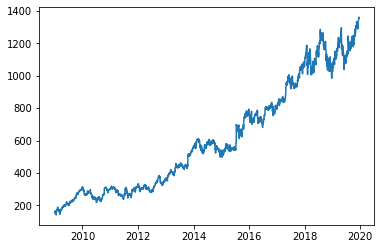

In [3]:
df1=df['Close']
plt.plot(df1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.01022198],
       [0.0158338 ],
       [0.01859661],
       ...,
       [0.98865638],
       [1.        ],
       [0.99523457]])

In [5]:
train_size=int(len(df1)*0.80)
test_size=len(df1)-train_size


In [7]:
train_data,test_data=df1[0:train_size,:],[train_size:len(df1),:1]

In [8]:
import numpy
def create_dataset(dataset,time_step):
  dataX, dataY =[] ,[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return numpy.array(dataX),numpy.array(dataY)



In [10]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [16]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
2107/2107 - 259s - loss: 7.8038e-04
Epoch 2/10
2107/2107 - 223s - loss: 4.0731e-04
Epoch 3/10
2107/2107 - 218s - loss: 2.3291e-04
Epoch 4/10
2107/2107 - 208s - loss: 2.0554e-04
Epoch 5/10
2107/2107 - 207s - loss: 1.5190e-04
Epoch 6/10
2107/2107 - 217s - loss: 1.6752e-04
Epoch 7/10
2107/2107 - 199s - loss: 1.0599e-04
Epoch 8/10
2107/2107 - 195s - loss: 1.1422e-04
Epoch 9/10
2107/2107 - 195s - loss: 9.9442e-05
Epoch 10/10
2107/2107 - 185s - loss: 1.1046e-04


In [19]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [20]:
train_predict=scaler.inverse_transform(train_pred)
test_predict=scaler.inverse_transform(test_pred)

In [21]:
from sklearn.metrics import mean_absolute_error
print("mean_square_error",round(np.mean(((test_pred- y_test)**2)),5))
print("mean_absolute_error",round(mean_absolute_error(test_pred,y_test),5))
print("mean_percent_absolute_error",round(np.mean(np.abs((test_pred- y_test) / test_pred)) * 100,5))

mean_square_error 0.00769
mean_absolute_error 0.02466
mean_percent_absolute_error 8.85453


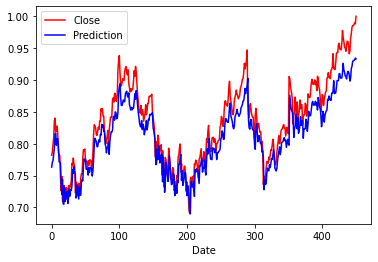

In [27]:
plt.figure()
plt.plot(y_test, color = 'r', label = 'Close')
plt.plot(test_pred, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()